<a href="https://colab.research.google.com/github/RiniPaul86/Assignment/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering on Shop Customer Data

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [52]:
df = pd.read_csv("/content/Customers.csv")

In [53]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [55]:
df.duplicated().sum()

0

In [56]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [57]:
#dropping the colum with null values
df.dropna(inplace=True)

In [58]:
#droppping the column customer id
df = df.drop('CustomerID', axis=1)

In [59]:
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,0
Work Experience,0
Family Size,0


In [60]:
df.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,48.894656,110616.009669,51.078880,4.092621,3.757252
std,28.414889,45833.860195,27.977176,3.926459,1.968335
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,73.000000,149095.000000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


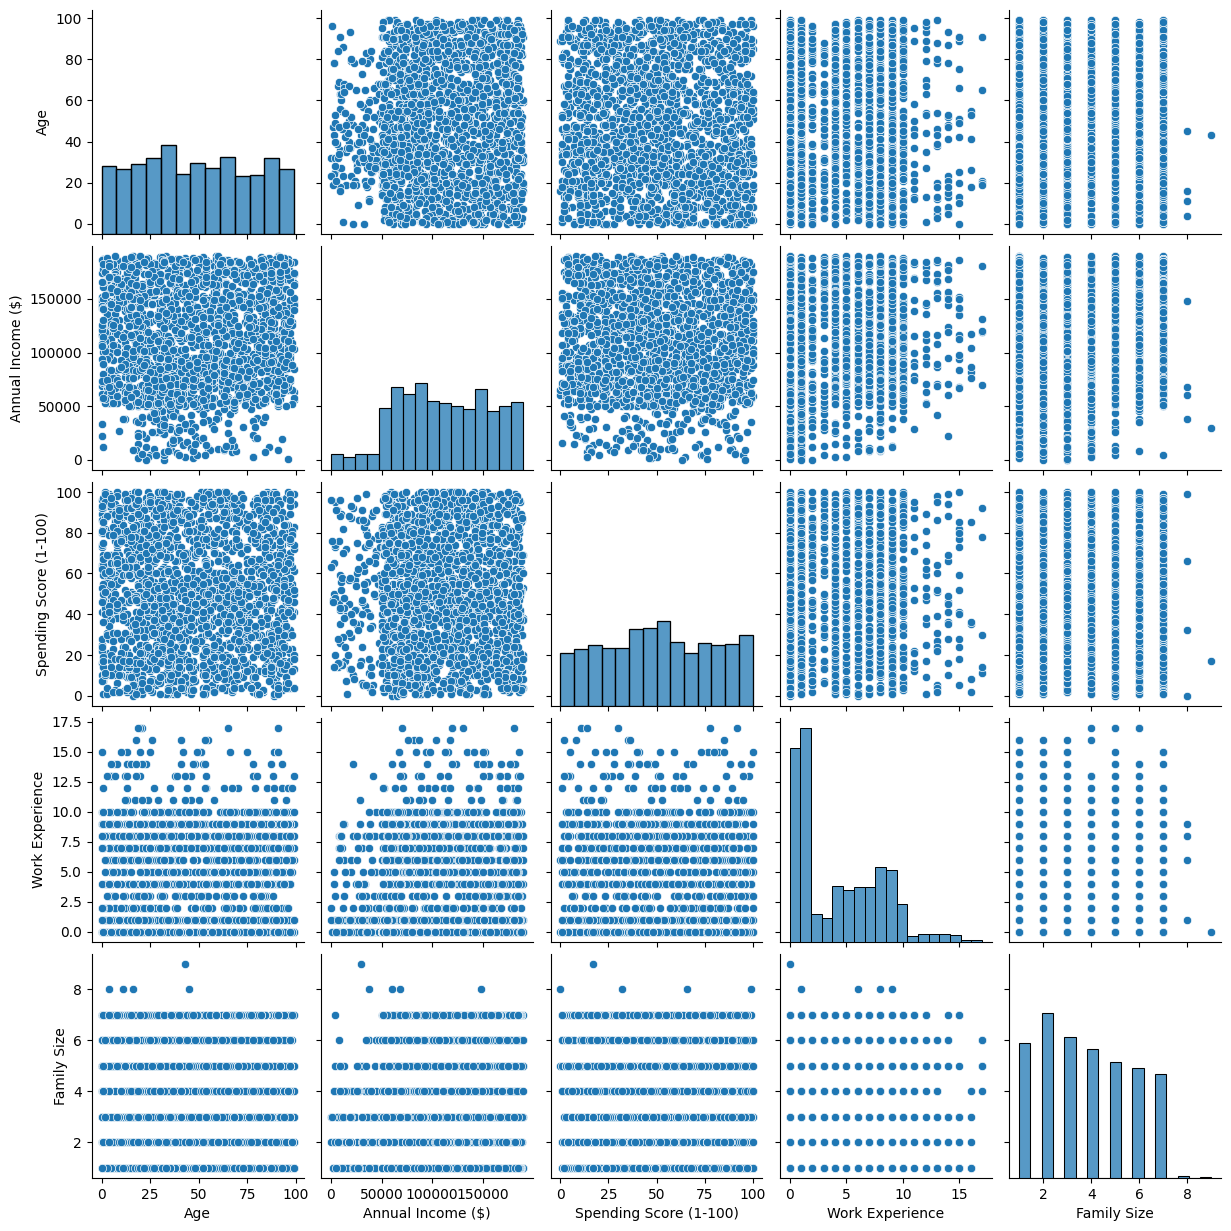

In [61]:
# Data Exploration
sns.pairplot(df)
plt.show()

In [62]:
unique_professions = df['Profession'].unique()
print(unique_professions)

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']


In [63]:
# Convert categorical variables
# Replacing with numerical values
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['Profession'] = df['Profession'].replace({'Artist': 0,
                                             'Doctor': 1,
                                             'Engineer': 2,
                                             'Entertainment': 3,
                                             'Executive': 4,
                                             'Healthcare': 5,
                                             'Homemaker': 6,
                                             'Lawyer': 7,
                                             'Marketing': 8})

In [64]:
# Preprocessing: Standardization
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [65]:
scaled_df

array([[-1.20802490e+00, -1.05234500e+00, -2.08667453e+00, ...,
         8.52669649e-01, -7.87836630e-01,  1.23358006e-01],
       [-1.20802490e+00, -9.81941450e-01, -1.65020484e+00, ...,
        -3.26426664e-01, -2.78342150e-01, -3.84814912e-01],
       [ 8.27797508e-01, -1.01714323e+00, -5.37207112e-01, ...,
        -3.26426664e-01, -7.87836630e-01, -1.40116075e+00],
       ...,
       [-1.20802490e+00,  1.34137577e+00, -4.28940804e-01, ...,
         8.52669649e-01,  1.25014129e+00, -8.92987830e-01],
       [-1.20802490e+00,  9.89358008e-01,  1.56022619e+00, ...,
         4.59637545e-01,  7.40646811e-01, -8.92987830e-01],
       [-1.20802490e+00,  1.44698110e+00, -1.31151925e-04, ...,
         6.66054406e-02,  2.31152330e-01, -8.92987830e-01]])

In [77]:
# Elbow Method to find the optimal K
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

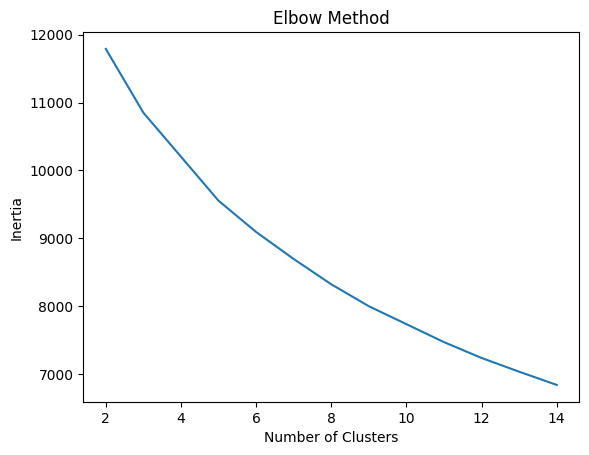

In [78]:
plt.plot(range(2, 15), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [79]:
wcss

[11789.212319923172,
 10850.085387510817,
 10202.646214447448,
 9554.192160499844,
 9094.221130552642,
 8696.482469689417,
 8323.83341625521,
 8001.272689034981,
 7737.296221217068,
 7472.496787015437,
 7239.42840833972,
 7037.28987013548,
 6842.640890197253]

In [80]:
# Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_score(scaled_df, cluster_labels))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

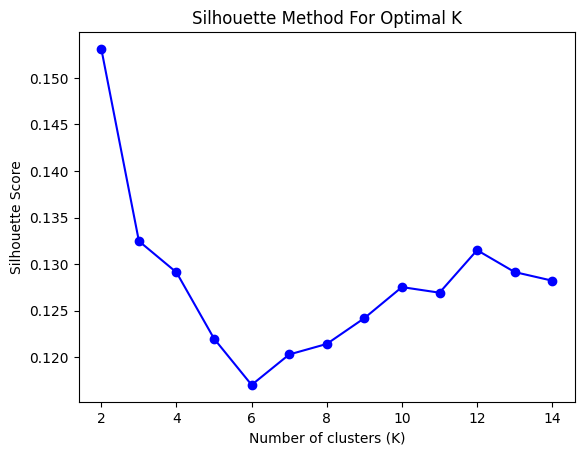

In [81]:
plt.plot(range(2, 15), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal K')
plt.show()

In [71]:
#choosing optimal K as 12 from both the graphs

In [72]:
# Final K-Means Clustering with optimal K

clusters_new = KMeans(12, random_state=42)
clusters_new.fit(scaled_df )


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=12, random_state=42)

In [73]:
clusters_new.labels_

array([11, 11,  3, ...,  1,  6,  1], dtype=int32)

In [74]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_

In [75]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 8.27797508e-01,  5.80810336e-01,  3.23932192e-01,
         6.95615819e-01, -3.74977688e-01,  1.15273793e+00,
        -2.17416774e-01],
       [-1.20802490e+00,  7.85570855e-01, -6.20089738e-01,
        -5.82156924e-01,  3.18474994e-02, -4.67236362e-01,
        -5.74947636e-01],
       [ 8.15679517e-01, -6.06036770e-01,  2.05669765e-01,
         8.75457503e-01,  5.81290339e-01, -5.93743495e-01,
         6.82953183e-01],
       [ 8.27797508e-01, -1.79096984e-01, -1.06680766e+00,
         3.65694785e-04, -8.51766605e-01, -3.90582271e-01,
        -6.43932786e-01],
       [-1.20802490e+00, -7.45006419e-01,  1.92430884e-01,
        -1.82407831e-01,  1.42188538e-01,  1.28933317e+00,
        -6.34992348e-01],
       [ 7.62125817e-01, -2.60428998e-02, -8.23127146e-01,
        -6.50748099e-01,  1.24316606e+00, -3.12856292e-01,
        -4.43828541e-01],
       [-1.20802490e+00,  9.60556554e-01,  6.57121978e-01,
         2.79949757e-01, -2.21618103e-01,  5.41480787e-01,
         1.6955554

In [76]:
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,clusterid_new
0,0,19,15000,39,5,1,4,11
1,0,21,35000,81,2,3,3,11
2,1,20,86000,6,2,1,1,3
3,1,23,59000,77,7,0,2,5
4,1,31,38000,40,3,2,6,3


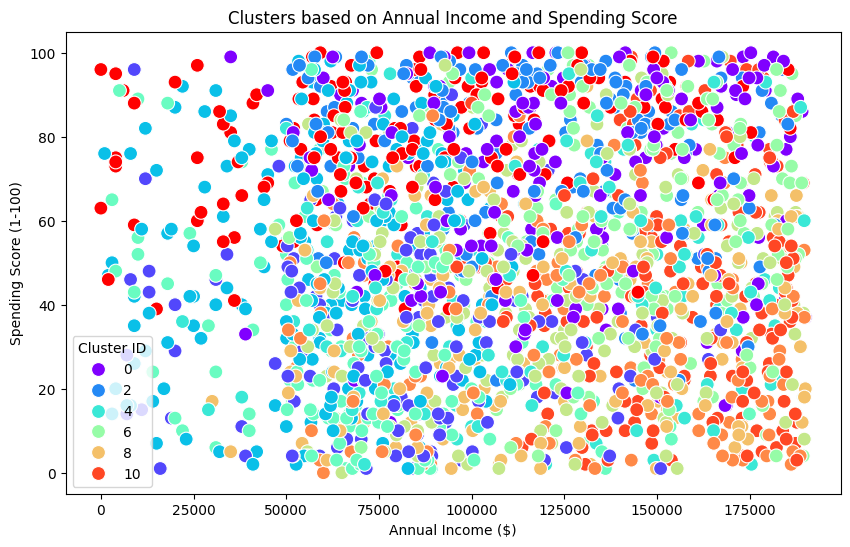

In [87]:
# 2D Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income ($)', y='Spending Score (1-100)', hue='clusterid_new', palette='rainbow', s=100)

# Add labels and title
plt.title('Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster ID')
plt.show()

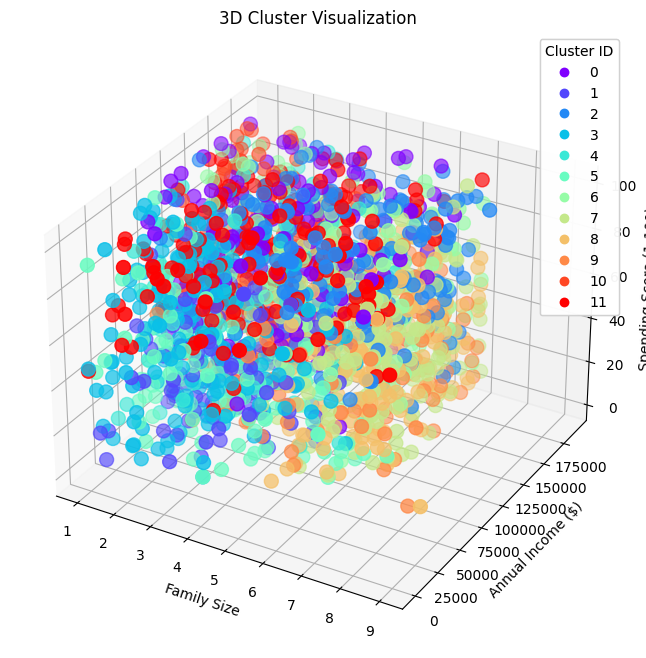

In [89]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting
scatter = ax.scatter(df['Family Size'], df['Annual Income ($)'], df['Spending Score (1-100)'],
                     c=df['clusterid_new'], cmap='rainbow', s=100)

# Add labels and title
ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Family Size')
ax.set_ylabel('Annual Income ($)')
ax.set_zlabel('Spending Score (1-100)')

# Add color bar to map colors to clusters
legend = ax.legend(*scatter.legend_elements(), title="Cluster ID")
ax.add_artist(legend)

plt.show()